In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
import nltk
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import datasets
from scipy.sparse import csr_matrix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel('lgyx_review_copy.xlsx')
raw_reviews = df['review']
raw_reviews = [str(s).strip() for s in raw_reviews]
y_train = list(df['class'])
len(raw_reviews)

725

In [3]:
test_df = pd.read_excel('shrzlzw_review_copy.xlsx')
raw_reviews_test = test_df['review']
raw_reviews_test = [str(s).strip() for s in raw_reviews_test]
y_test = list(test_df['class'])
len(raw_reviews_test)

897

In [52]:
# test_df2 = pd.read_excel('rgnstsh_review_copy.xlsx')
# raw_reviews_test2 = df2['review']
# raw_reviews_test2 = [str(s).strip() for s in raw_reviews2]
# y_train2 = list(df2['class'])
# len(raw_reviews2)

988

In [4]:
raw_reviews = raw_reviews_test + raw_reviews
y = y_train + y_test
print(len(raw_reviews), len(y))

1622 1622


In [5]:
# 分词
texts = [list(jieba.cut(review, cut_all=False)) for review in raw_reviews]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.111 seconds.
Prefix dict has been built succesfully.


In [6]:
texts = [[word.strip() for word in review if word.strip()] for review in texts]

In [7]:
print(texts[:5])

[['看不下去'], ['我', '跑', '偏', '了', '。', '。', '老', '想', '她们', '到底', '是', '买', '套', '还是', '吃药', '?', '然后', '想起', '无', '后', '！', '真', '省钱', '。', '。'], ['官方', '吐槽', '，', '柯南', '附体', '?'], ['让', '我', '想', '起来', '我', '搭', '公交', '的', '一件', '事', '，', '一个', '妹子', '做', '在', '老弱病残', '坐', '然后', '带', '着', '耳机', '闭', '着眼', '，', '手', '搭', '在', '前面', '座椅', '上', '然后', '头', '抵', '在', '手上', '，', '貌似', '睡着', '了', '，', '因为', '我', '上来', '的', '时候', '妹子', '就是', '那个', '姿势', '，', '中间', '经过', '几个', '站', '也', '没', '反应', '，', '然后', '上来', '个', '女', '的', '，', '大概', '是', '那种', '生完', '孩子', '还', '在', '坐月子', '中', '，', '头包', '着', '还', '穿着', '那种', '厚厚的', '睡衣', '，', '后面', '那', '大概', '是', '她', '婆婆', '抱', '着', '小孩', '，', '然后', '那女', '的', '左右', '看看', '就', '直接', '到', '那', '妹子', '边', '了', '，', '叫', '了', '两声', '那', '妹子', '没', '听见', '，', '毕竟', '带', '了', '耳机', '又', '睡着', '了', '，', '那女', '的', '不耐烦', '了', '就', '推', '了', '那', '妹子', '一下', '，', '那', '妹子', '一下', '就', '惊醒', '了', '，', '然后', '那女', '的', '就', '直接', '叫', '妹子', '起来', '，', '话语', '

In [8]:
# for i in range(len(texts)):
#     if texts[i] != []:
#         for j in range(len(texts[i]))[::-1]:
#             if texts[i][j].isdigit():
#                 texts[i].pop(j)
texts = [[word for word in review if not word.isdigit()] for review in texts if review]

In [10]:
stop_words  = list(pd.read_excel('stop_words.xlsx')['words'])
stop_words = [str(x) for x in stop_words]
# for s in stop_words:
#     for i in range(len(texts)):
#         while(s in texts[i]):
#             texts[i].remove(s)
texts = [[word for word in review if word not in stop_words and len(word) > 1] for review in texts]

In [90]:
# for i in range(len(texts)):
#     for j in range(len(texts[i]))[::-1]:
#         if len(texts[i][j]) ==1:
#             texts[i].pop(j)

In [11]:
len(texts)

1622

In [92]:
# from nltk.collocations import BigramCollocationFinder
# from nltk.metrics import BigramAssocMeasures
# word_list = []
# for review in texts:
#     for char in review:
#         word_list.append(char) 
# bigrams = BigramCollocationFinder.from_words(word_list)
# most_informative_pmi_bigrams = bigrams.nbest(BigramAssocMeasures.pmi, 3)
# print(most_informative_pmi_bigrams)

'from nltk.collocations import BigramCollocationFinder\nfrom nltk.metrics import BigramAssocMeasures\nword_list = []\nfor review in texts:\n    for char in review:\n        word_list.append(char) \nbigrams = BigramCollocationFinder.from_words(word_list)\nmost_informative_pmi_bigrams = bigrams.nbest(BigramAssocMeasures.pmi, 3)\nprint(most_informative_pmi_bigrams)'

In [12]:
X_y_df = pd.DataFrame({
    'X':texts[:725],
    'y':y_train
})

In [13]:
X_y_df_test = pd.DataFrame({
    'X':texts[725:],
    'y':y_test
})

In [14]:
null_index = []
for i in range(len(texts[:725])):
    if texts[i] == []:
        null_index.append(i)
X_y_df = X_y_df.drop(null_index)

In [15]:
null_index = []
for i in range(725,len(texts)):
    if texts[i] == []:
        null_index.append(i)
null_index = [x-725 for x in null_index]
X_y_df_test = X_y_df_test.drop(null_index)

In [16]:
texts_train = list(X_y_df['X'])
y_train = list(X_y_df['y'])
print(len(texts_train),len(y_train))

667 667


In [17]:
texts_test = list(X_y_df_test['X'])
y_test = list(X_y_df_test['y'])
print(len(texts_test),len(y_test))

865 865


In [18]:
texts = texts_train+texts_test
len(texts)

1532

In [19]:
from gensim import corpora, models, similarities
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]  

In [21]:
print(len(X_train), len(y_train))

NameError: name 'X_train' is not defined

In [20]:
data, rows, cols = [], [], []
for line_num, line in enumerate(corpus_tfidf):
    for elem in line:
        rows.append(line_num)
        cols.append(elem[0])
        data.append(elem[1])
tfidf_matrix = csr_matrix((data,(rows,cols))).toarray()

In [23]:
from sklearn import cross_validation
X_train = tfidf_matrix[:667]
X_test = tfidf_matrix[667:]
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train,y_train)
pred = clf.predict(X_test)
print(np.mean(pred == y_test))

0.458959537572


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(100)
rf = RandomForestClassifier(random_state=10)
parameters = {'n_estimators':range(10,100,10),}
gs_clf = GridSearchCV(rf, parameters, n_jobs=-1).fit(X_train,y_train)
print(gs_clf.best_params_)

{'n_estimators': 90}


In [25]:
parameters = {'class_weight':[{0:0.7,1:0.3},{0:0.65,1:0.35},{0:0.6,1:0.4},{0:0.55,1:0.45}]}
rf = RandomForestClassifier(random_state=10,n_estimators=20)
gs_clf = GridSearchCV(rf, parameters, n_jobs=-1).fit(X_train,y_train)
print(gs_clf.best_params_)

{'class_weight': {0: 0.55, 1: 0.45}}


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10).fit(X_train,y_train)
pred = rf.predict(X_test)

In [33]:
for i in range(len(y_test)):
    if y_test[i] != pred[i]:
        print(texts_test[i])

['觉着', '狐狐', '亲娘', '可怜', '爱上', '垃圾', '男人', '变态', '偶无语', '可怜', '之人', '必有', '可恨']
['看文', '可以', '一分', '觉得', '过意不去', '打分', '希望', '尽可能', '地多', '提意见', '想法', '先谢', '看文', '愉快', '觉得', '霸王', '不用', '偷偷摸摸', '可以', '光明正大', '谢谢', '大人']
['好看', '玲珑', '心思']
['答秋', '万俟', '现在', '妹妹', '万俟', '美貌', '性格', '恶劣', '天才', '少女', '当时', '写时', '设定', '沈狐', '题柔', '妃色', '勾心斗角', '妃色', '弟弟', '暧昧关系', '但是', '因为', '事不关己', '假装', '不知', '而已', '不过', '这点', '挑明', '罪过', '罪过', '迦蓝为', '不为人知', '原因', '琉璃', '听雪', '里会', '详细', '交代', '其实', '不是', '忠诚', '影子', '沈狐', '有时候', '不算', '推心置腹']
['万俟', '一定', '女子']
['当然', '万俟', '唯了', '还用说']
['终于', '找到', '结局', '感动']
['万俟', '是不是', '据说', '夭折', '大姐', '所扮', '万俟', '早已']
['恩恩', '这个', '万俟', '女子']
['happy', 'ending']
['偶汗', '幽默']
['光鲜亮丽', '背后', '有着', '辛酸', '故事', '世人', '表象', '每个', '背负着', '过去', '品味']
['愚钝', '看出', '这个', '少年', '万俟', '万俟', '文中', '提到']
['感觉', '身体', '灵魂', '不是', '场子', '不过', '确实', '一点点', '怪怪的', '应该', '就是', '身体', '灵魂', '不是', '精神病']
['真的', '绝配']
['喜欢', '十四', '作品', '感情', '细腻', '偶想', '问下', '这是', '十四', '伊吕写',

In [27]:
from sklearn import metrics
print(metrics.precision_score(y_test,pred))#P = TP/(TP+FP)
print(metrics.recall_score(y_test,pred))#R = TP/(TP+FN)
print(metrics.f1_score(y_test,pred))

0.435294117647
0.885638297872
0.583698510079


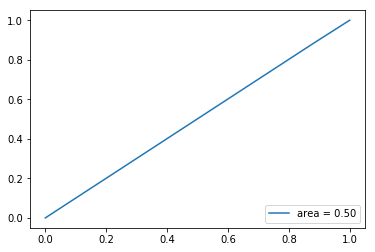

In [28]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, pred,pos_label=1)#fpr:假阳性率 tpr:真阳性率
auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'area = %0.2f'%auc)
plt.legend(loc="lower right")

In [76]:
def plot_curve(rangex,train_loss,test_loss,xlabel):
    plt.plot(rangex,train_loss_mean,"o-",color="r",label="Training")
    plt.plot(rangex,test_loss_mean,"o-",color="g",label="Cross-validation")
    plt.xlabel(xlabel)
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()

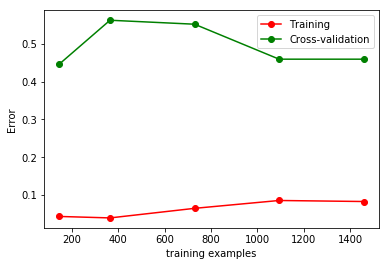

In [77]:
from sklearn.learning_curve import learning_curve
train_sizes,train_loss,test_loss=learning_curve(RandomForestClassifier(random_state=10),X_train,y_train,cv=10,scoring='neg_mean_squared_error',
                                                train_sizes=[0.1,0.25,0.5,0.75,1])
train_loss_mean= (-1)*train_loss.mean(axis=1)#negtive mean squred error得出全是负值，10折表示每次有10个loss需要求行均值
test_loss_mean= (-1)*test_loss.mean(axis=1)
plot_curve(train_sizes,train_loss_mean,test_loss_mean,'training examples')

In [29]:
import jieba.analyse
sentence = ''
for review in texts:
    sentence += ''.join(review)
jieba.analyse.extract_tags(sentence, topK=20, withWeight=True, allowPOS=())

[('撒花', 0.15261581342756064),
 ('女主', 0.133486774780073),
 ('喜欢', 0.11694163463354305),
 ('万俟', 0.10557216868799657),
 ('好看', 0.09949966927690573),
 ('完结', 0.07117138283434614),
 ('沈狐', 0.06032575398714837),
 ('哈哈哈哈', 0.055173631815196474),
 ('男主', 0.051341067223105),
 ('作者', 0.051056951863209146),
 ('不错', 0.04783689444646768),
 ('觉得', 0.04095811514482929),
 ('狐狸', 0.037492779286837016),
 ('感觉', 0.03634192584910887),
 ('真的', 0.03508235491233197),
 ('好文', 0.030804640333863),
 ('期待', 0.029533946875621647),
 ('欧阳', 0.029353186308320806),
 ('加油', 0.029312298796035002),
 ('包子', 0.02882030446983788)]